## Importing cryptocurrency vs real currency comparion (API)
## Bitcoin vs EUR

- Use https://www.coingecko.com/en/api to import Bitcoin vs EUR from 16-06-2019 to 16-16-2020
- Convert results to percentages so they can be plotted against other currency combinations

In [1]:
import requests
import pandas as pd
import json

In [2]:
# Defining coingecko API url with variables for cryptocurrency and real world currency

def get_api(cryp_currency, real_currency):
    base = 'https://api.coingecko.com/api/v3/'
    url = ''.join(base + 'coins/' + cryp_currency + '/market_chart/range?vs_currency=' + real_currency + '&from=1560643200&to=1592265600')
    
    return url

api_call = get_api('bitcoin', 'eur')


In [3]:
# Importing data

def to_json_format(api):
    result = requests.get(api)
    json_data = result.json()
    
    return json_data

json_obj = to_json_format(api_call)


In [4]:
# Creating dataframe

df = pd.DataFrame(json_obj['prices'], columns=['date', 'price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    367 non-null    int64  
 1   price   367 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.9 KB


In [5]:
## Converting 'time' column to dtype timestamp

df['date'] = pd.to_datetime(df['date'], unit='ms')
df

,date,price
0,2019-06-16,7853.059952
1,2019-06-17,8006.856370
2,2019-06-18,8298.389613
3,2019-06-19,8121.834445
4,2019-06-20,8264.077225
...,...,...
362,2020-06-12,8258.589886
363,2020-06-13,8413.320493
364,2020-06-14,8413.267326
365,2020-06-15,8304.428332


## Creating function to input cryptocurrency and real_world currency and output dataframe of market values for the timeframe 16-06-2019 to 16-06-2020

In [6]:
def crypto_vs_real(crypto_currency, real_currency):
    api_call = get_api(crypto_currency, real_currency)
    json_obj = to_json_format(api_call)
    
    df = pd.DataFrame(json_obj['prices'], columns=['date', real_currency])
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    
    return df
    
df_bc_eur = crypto_vs_real('bitcoin', 'eur')
df_bc_eur.head()

,date,eur
0,2019-06-16,7853.059952
1,2019-06-17,8006.856370
2,2019-06-18,8298.389613
3,2019-06-19,8121.834445
4,2019-06-20,8264.077225


In [7]:
# Getting data for bitcoin vs USD and CNY

df_bc_usd = crypto_vs_real('bitcoin', 'usd')
df_bc_usd.head()

,date,usd
0,2019-06-16,8818.609507
1,2019-06-17,8978.772588
2,2019-06-18,9312.868295
3,2019-06-19,9094.021746
4,2019-06-20,9285.928674


In [8]:
df_bc_cny = crypto_vs_real('bitcoin', 'cny')
df_bc_cny.head()

,date,cny
0,2019-06-16,61072.398279
1,2019-06-17,62183.333561
2,2019-06-18,64499.063236
3,2019-06-19,62778.760320
4,2019-06-20,64106.337196


In [10]:
# Merging dataframes for EUR, USD and CNY

df_compare_bc = df_bc_eur.merge(df_bc_usd).merge(df_bc_cny)

df_compare_bc.head()

,date,eur,usd,cny
0,2019-06-16,7853.059952,8818.609507,61072.398279
1,2019-06-17,8006.856370,8978.772588,62183.333561
2,2019-06-18,8298.389613,9312.868295,64499.063236
3,2019-06-19,8121.834445,9094.021746,62778.760320
4,2019-06-20,8264.077225,9285.928674,64106.337196


## Visualizing the data

In [11]:
# Creating Plot

import matplotlib.pyplot as plt
%matplotlib inline

df_compare_bc.set_index('date', inplace=True)


In [13]:
df_compare_bc.head()

,eur,usd,cny
date,,,
2019-06-16,7853.059952,8818.609507,61072.398279
2019-06-17,8006.856370,8978.772588,62183.333561
2019-06-18,8298.389613,9312.868295,64499.063236
2019-06-19,8121.834445,9094.021746,62778.760320
2019-06-20,8264.077225,9285.928674,64106.337196


Text(0, 0.5, 'Value of Bitcoin')

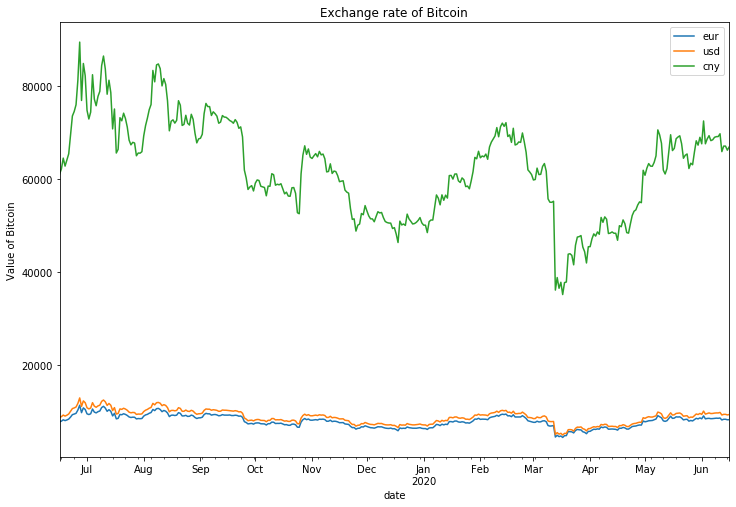

In [14]:
df_compare_bc.plot(figsize=(12,8))

plt.title(label='Exchange rate of Bitcoin')
plt.ylabel('Value of Bitcoin')



## The above graph is misleading because of the exchange rates between these currencies
## So we'll normalize by converting everything to Euro values

In [15]:
# Using https://exchangeratesapi.io/ API to convert currencies to EURO by historic exchange rates

api_exchange_rate = 'https://api.exchangeratesapi.io/history?start_at=2019-06-16&end_at=2020-06-16&symbols=USD,CNY'

json_dict = to_json_format(api_exchange_rate)


In [16]:
# Converting dict of dicts to list of dicts

def dicts_to_json(j_dict):
    dict_key = next(iter(j_dict))
    json_list = json_dict[dict_key]
    return json_list 

exchange_json = dicts_to_json(json_dict)


In [20]:
# Changing current index to 'date' column and adding number index
def change_df_index(json):
    df = pd.DataFrame.from_dict(json, orient='index')
    df = df.reset_index()
    
    return df

df_exchange = change_df_index(exchange_json)

df_exchange.head()

,index,CNY,USD
0,2019-06-28,7.8185,1.1380
1,2019-07-15,7.7484,1.1269
2,2020-06-04,8.0066,1.1250
3,2019-09-23,7.8279,1.0985
4,2019-07-04,7.7567,1.1288


In [24]:
# Renaming columns

def rename_cols(df):
    cols = df.columns
    
    
    return cols

rename_cols(df_exchange)
#df_exchange.columns = ['date', 'cny_to_eur', 'usd_to_eur']
#df_exchange.head()

['%{0}%'.format(element) for element in elements]

Index(['index', 'CNY', 'USD'], dtype='object')

In [ ]:
# Converting 'date' column to datetime dtype

df_exchange['date'] = pd.to_datetime(df_exchange['date'])
df_exchange.dtypes

In [ ]:
# Sorting values by date

df_exchange = df_exchange.sort_values(by=['date'])

In [ ]:
df_exchange.head()

In [ ]:
# resetting indices

df_exchange = df_exchange.reset_index(drop=True)
df_exchange.head()


## Now we'll merge the df_exchange with df_compare_bc

- We need to pay attention to the missing dates from df_exchange, because cryptocurrencies don't close on weekends.
- We'll fill the empty dates from the real world currencies with the last known exchange rate (i.e. Fridays' rates)
- Then we need to mconvert the USD and CNY values according to their exchange rates 

In [ ]:
# Now I see I didn't need to reset the indices, but I'll leave it in to show I can do it
# Setting date column as index to match df_compare_bc dataframe

df_exchange.set_index('date', inplace=True)

df_exchange.head()


In [ ]:
df_crypto_exchange = df_compare_bc.join(df_exchange)
df_crypto_exchange.head(20)

In [ ]:
df_crypto_exchange.info()

In [ ]:
# Now it's time to fill the NaN values with the preceding values. In the case of the first row, 
# we'll use the succeeding value

df_crypto_exchange = df_crypto_exchange.fillna(method='ffill')
df_crypto_exchange = df_crypto_exchange.fillna(method='bfill')
df_crypto_exchange.head(20)

In [ ]:
# Reordering columns
cols = ['eur', 'cny', 'cny_to_eur', 'usd', 'usd_to_eur']

df_crypto_exchange = df_crypto_exchange[cols]

df_crypto_exchange.head()

In [ ]:
# Now to convert usd and cny to euro by their exchange rates

df_crypto_exchange['cny_eur_value'] = df_crypto_exchange['cny'] / df_crypto_exchange['cny_to_eur']

df_crypto_exchange.head()

In [ ]:
df_crypto_exchange['usd_eur_val'] = df_crypto_exchange['usd'] / df_crypto_exchange['usd_to_eur']

df_crypto_exchange.head()

## Now we can plot a more accurate graph that displays the values of Bitcoin
## in different currencies (EUR, CNY, USD)

In [ ]:
# Get the relevant columns

df_to_plot = df_crypto_exchange[['eur', 'cny_eur_value', 'usd_eur_val']]
df_to_plot.head()

In [ ]:
# And now to plot a more accurate visualisation

df_to_plot.plot(figsize=(12,8))

plt.title(label='Exchange rate of Bitcoin')
plt.ylabel('Value of Bitcoin')


## Let's turn the currency conversion into a function

In [ ]:
def get_exchange_api(currencies: list):
    api = ''.join('https://api.exchangeratesapi.io/history?start_at=2019-06-16&end_at=2020-06-16&symbols=' + ",".join(currencies))
    result = requests.get(api)
    json = result.json()

    return (json)

get_exchange_api(['CNY','USD'])